In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

/Users/yimengye/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train_csv = pd.read_csv("train_data.csv")
validation_csv = pd.read_csv("validation_data.csv")
test_csv = pd.read_csv("test_data.csv")

In [3]:
train_csv.head()

,school,failures,Dalc,Walc,absences,Avg Grade of 3 Period
0,GP,0,1,1,6,5.666667
1,GP,0,1,1,4,5.333333
2,GP,3,2,3,10,8.333333
3,GP,0,1,1,2,14.666667
4,GP,0,1,2,4,8.666667


In [36]:

# For the features, select all rows and all columns except the last one
X_train = train_csv.iloc[:, :-1]

# For the target variable, select all rows and only the last column
y_train = train_csv.iloc[:, -1]

# If 'school' is a categorical variable, convert it using one-hot encoding
X_train = pd.get_dummies(X_train, columns=['school'])
# Initialize the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=30)

# Train the model on the training data
rf.fit(X_train, y_train)

# Evaluate the model on the validation data
X_validation = validation_csv.iloc[:, :-1]
y_validation = validation_csv.iloc[:, -1]
X_validation = pd.get_dummies(X_validation, columns=['school'])

# Predict on validation data
y_pred = rf.predict(X_validation)

# Calculate the performance metrics, e.g., MSE
# mse = mean_squared_error(y_validation, y_pred)
# print(f'Mean Squared Error: {mse}')

# Predict on test data (you would do this after finalizing the model)
X_test = test_csv.iloc[:, :-1]
y_test = test_csv.iloc[:,-1]
X_test = pd.get_dummies(X_test, columns=['school'])
y_test_pred = rf.predict(X_test)

# Now y_test_pred contains the predicted grades for the test set
mse_test = mean_squared_error(y_test,y_test_pred)
print(f'Mean Squared Error for test set is :{mse_test}')

Mean Squared Error for test set is :13.437216294218318


In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [6]:
# Define a dataset class
class RegressionDataset(Dataset):
    def __init__(self, features, targets):
        self.features = features
        self.targets = targets
    
    def __len__(self):
        return len(self.targets)
    
    def __getitem__(self, idx):
        return self.features[idx], self.targets[idx]

In [14]:
# Assuming your data is in train_csv and test_csv DataFrames and normalized if necessary
# Convert to numpy arrays
X_train_values = X_train.values.astype(np.float32)
y_train_values = y_train.values.astype(np.float32).reshape(-1, 1)
X_validation_values = X_validation.values.astype(np.float32)
y_validation_values = y_validation.values.astype(np.float32).reshape(-1,1)
X_test_values = X_test.values.astype(np.float32)
y_test_values = y_test.values.astype(np.float32).reshape(-1, 1)

In [15]:
# Standardize features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train_values)
# X_validation_values = scaler.fit_transform(X_validation_values)
# Create datasets
train_dataset = RegressionDataset(torch.tensor(X_train_values), torch.tensor(y_train_values))
val_dataset = RegressionDataset(torch.tensor(X_validation_values), torch.tensor(y_validation_values))
test_dataset = RegressionDataset(torch.tensor(X_test_values), torch.tensor(y_test_values))

In [16]:
# Define the neural network structure
class Net(nn.Module):
    def __init__(self, n_features):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(n_features, 64)  # 64 neurons in the first hidden layer
        self.fc2 = nn.Linear(64, 32)          # 32 neurons in the second hidden layer
        self.fc3 = nn.Linear(32, 1)           # Output layer
        self.dropout = nn.Dropout(0.1)        # Dropout layer for regularization
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)                   # Apply dropout
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)                   # Apply dropout
        x = self.fc3(x)
        return x

Epoch 1/100, Train Loss: 118.76158650716145, Val Loss: 108.28224563598633
Epoch 2/100, Train Loss: 104.64595540364583, Val Loss: 91.74267578125
Epoch 3/100, Train Loss: 88.4002448187934, Val Loss: 77.3889217376709
Epoch 4/100, Train Loss: 73.38777626885309, Val Loss: 71.42688369750977
Epoch 5/100, Train Loss: 61.73132832845052, Val Loss: 74.41971111297607
Epoch 6/100, Train Loss: 54.80918078952365, Val Loss: 75.11342906951904
Epoch 7/100, Train Loss: 52.244458728366425, Val Loss: 70.76051330566406
Epoch 8/100, Train Loss: 46.60861163669162, Val Loss: 57.67879772186279
Epoch 9/100, Train Loss: 42.81935713026259, Val Loss: 47.7950496673584
Epoch 10/100, Train Loss: 38.73420185512967, Val Loss: 41.27757263183594
Epoch 11/100, Train Loss: 33.491555743747284, Val Loss: 37.73738098144531
Epoch 12/100, Train Loss: 32.34636773003472, Val Loss: 35.39546203613281
Epoch 13/100, Train Loss: 30.121799892849392, Val Loss: 32.56534004211426
Epoch 14/100, Train Loss: 29.080504099527996, Val Loss: 30.9

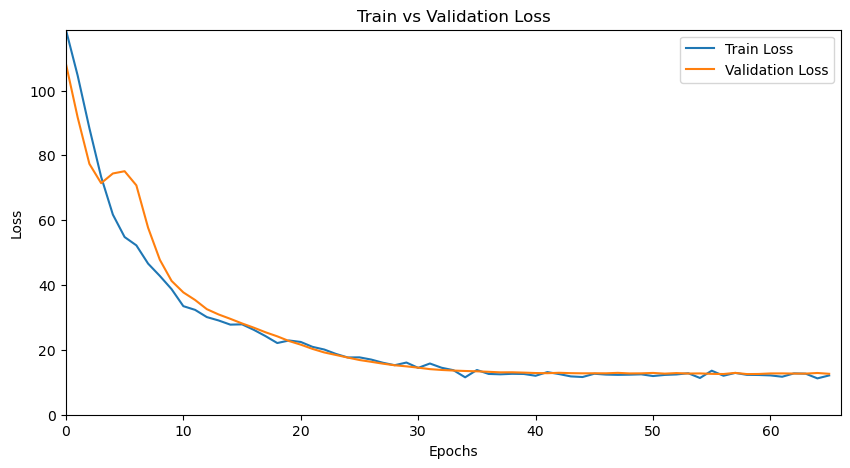

In [37]:
# Initialize the model
# model = Net(X_train_scaled.shape[1])
model = Net(X_train_values.shape[1])

# Choose Mean Squared Error Loss function for regression
criterion = nn.MSELoss()

# Choose the Adam optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Create data loader
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)
# Early stopping parameters
patience = 10
min_delta = 0.1
best_loss = np.inf
counter = 0
early_stop = False

# Initialize lists for tracking losses
train_losses = []
val_losses = []

# Train the model
epochs = 100
for epoch in range(epochs):
    model.train()
    epoch_losses = []  # List to store losses for each batch in the epoch
    for inputs, targets in train_loader:
        # Zero the parameter gradients
        optimizer.zero_grad()
        # Forward pass
        outputs = model(inputs)
        # Calculate loss
        loss = criterion(outputs, targets.view(-1, 1))
        # Backward pass and optimize
        loss.backward()
        optimizer.step()
        epoch_losses.append(loss.item())
    
    # Record the average training loss for this epoch
    avg_train_loss = np.mean(epoch_losses)
    train_losses.append(avg_train_loss)

    # Validation step
    model.eval()
    val_epoch_losses = []  # List to store losses for each batch in the validation data
    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = model(inputs)
            val_loss = criterion(outputs, targets.view(-1, 1))
            val_epoch_losses.append(val_loss.item())
        avg_val_loss = np.mean(val_epoch_losses)
    
    val_losses.append(avg_val_loss)  # Record the average validation loss for this epoch
    
    # Early stopping check
    if avg_val_loss < best_loss - min_delta:
        best_loss = avg_val_loss
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print(f'Early stopping triggered after epoch {epoch+1}')
            early_stop = True
            break
    
    # Print statistics
    print(f'Epoch {epoch+1}/{epochs}, Train Loss: {avg_train_loss}, Val Loss: {avg_val_loss}')

    if early_stop:
        print("Stopped early due to increasing validation loss.")
        break

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Train vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim(0, len(train_losses))
plt.ylim(0, max(max(train_losses), max(val_losses)))
plt.legend()
plt.show()

In [38]:
model.eval()
test_losses = []
with torch.no_grad():
    for inputs, targets in test_loader:
        # Make predictions
        outputs = model(inputs)
        
        # Compute loss
        test_loss = criterion(outputs, targets.view(-1, 1))
        test_losses.append(test_loss.item())

# Calculate the average loss over all the test set
avg_test_loss = np.mean(test_losses)
print(f'Average Test Loss: {avg_test_loss}')

Average Test Loss: 12.828926086425781
